# Decision Trees

**Introduction**

Decision Trees are versatile and interpretable supervised learning models used for both classification and regression tasks. They break down a dataset into smaller subsets while forming a tree-like structure, making decisions based on features to reach a prediction.

**Algorithm**

1.   Splitting: Decision Trees partition the dataset based on features that lead to the best separation of classes or the most significant information gain.
2.   Node Creation: Each node in the tree represents a feature. The tree grows by selecting the best feature at each node, aiming to maximize information gain or minimize impurity.
3. Leaf Nodes: Terminal nodes or leaf nodes represent the final decision or output.

**Advantages**

Easy to interpret and visualize.

1.   Handles both numerical and categorical data.
2.   Requires little data preprocessing.
3. Can capture non-linear patterns.


**Disadvantages**



1.   Prone to overfitting, especially with deep trees.
2.   Sensitive to small variations in the data.
3. Not suitable for linear relationships.









In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Considering only 'Glucose' and 'BloodPressure' to determine if the patient has diabetes or not.

In [4]:
# List of column names for reference
col_names = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

# Load the diabetes dataset from a CSV file
diabetes = pd.read_csv("/content/sample_data/diabetes.csv")

# Selecting specific columns from the dataset
cols = ['Glucose', "BloodPressure", "Outcome"]
diabetes = diabetes[cols]

# Extracting the features (X) and the target variable (y)
# Selecting 'Glucose' and 'BloodPressure' as features
X_col = ['Glucose', "BloodPressure"]
X = pd.DataFrame(diabetes[X_col])  # Features
y = diabetes["Outcome"]  # Target variable



Initially, examining the dataset's distribution is crucial. Blue denotes the absence of diabetes, while red indicates its presence. Observing the plot, it's evident there isn't a clear linear separation between the blue and red dots. Therefore, employing a linear regression approach for classification might be challenging due to this lack of a discernible linear boundary.

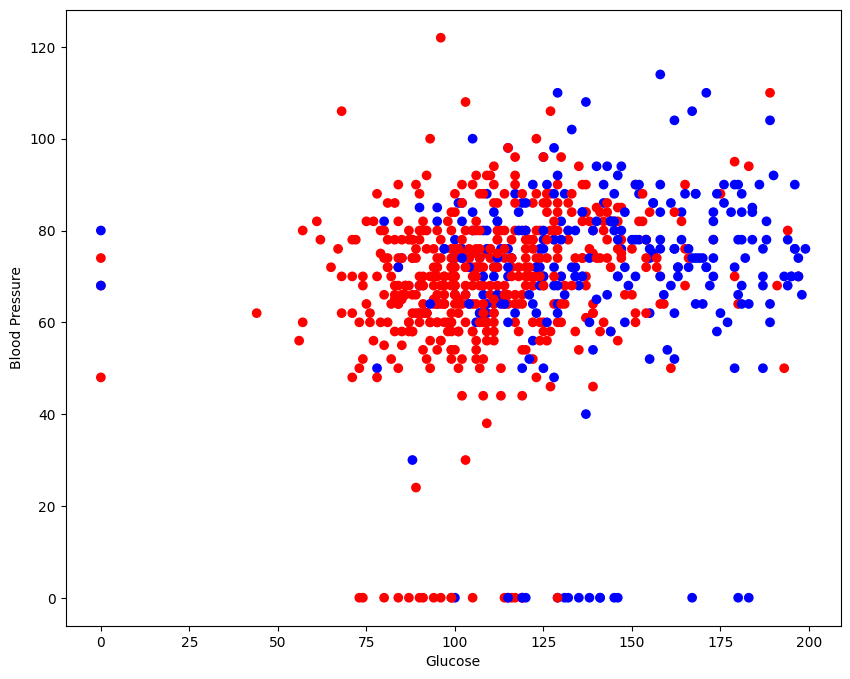

In [5]:
# Creating colors for plotting based on Outcome (0 or 1)
colors = ["red" if Outcome == 0 else "blue" for Outcome in y]

# Plotting the dataset using Glucose and Blood Pressure features
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()


By using the train_test_split function in sklearn library, we can split the whole data into training set and test set by the ratio of 4:1.

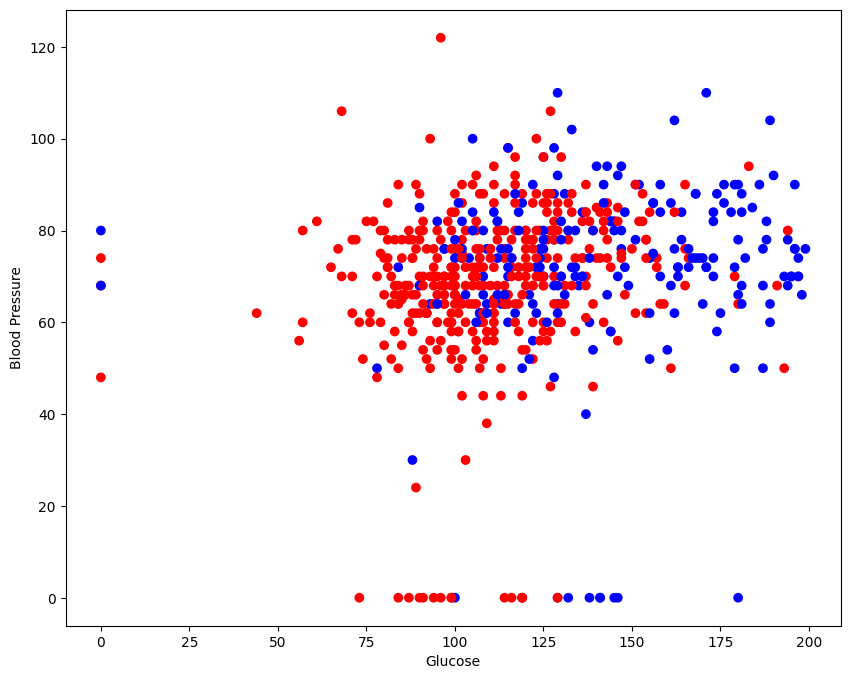

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating colors for plotting training and testing datasets
c_train = ["red" if Outcome == 0 else "blue" for Outcome in y_train]
c_test = ["red" if Outcome == 0 else "blue" for Outcome in y_test]

# Plotting the training dataset using Glucose and Blood Pressure features
plt.figure(figsize=(10, 8))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=c_train)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()


In [7]:
# Defining feature names for Glucose and Blood Pressure
features = ["Glucose", "Blood Pressure"]

# Defining label colors for the two classes (red and blue)
labels = ["red", "blue"]


By using the DecisionTreeClassifier from sklearn, we can easily fit the decision tree model of our dataset. In order to avoid overfitting, I set the max_depth = 4 to simplify the whole model.


In [8]:
# Importing the DecisionTreeClassifier from the scikit-learn library
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree Classifier with specified parameters
# max_depth controls the maximum depth of the tree to prevent overfitting
# random_state sets the random seed for reproducibility
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fitting the Decision Tree model using the training data
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Using the tree function from sklearn, we can generate a visual representation of the decision tree model based on our dataset. This visualization provides insights into the decisions made at each node along with their corresponding Gini values.

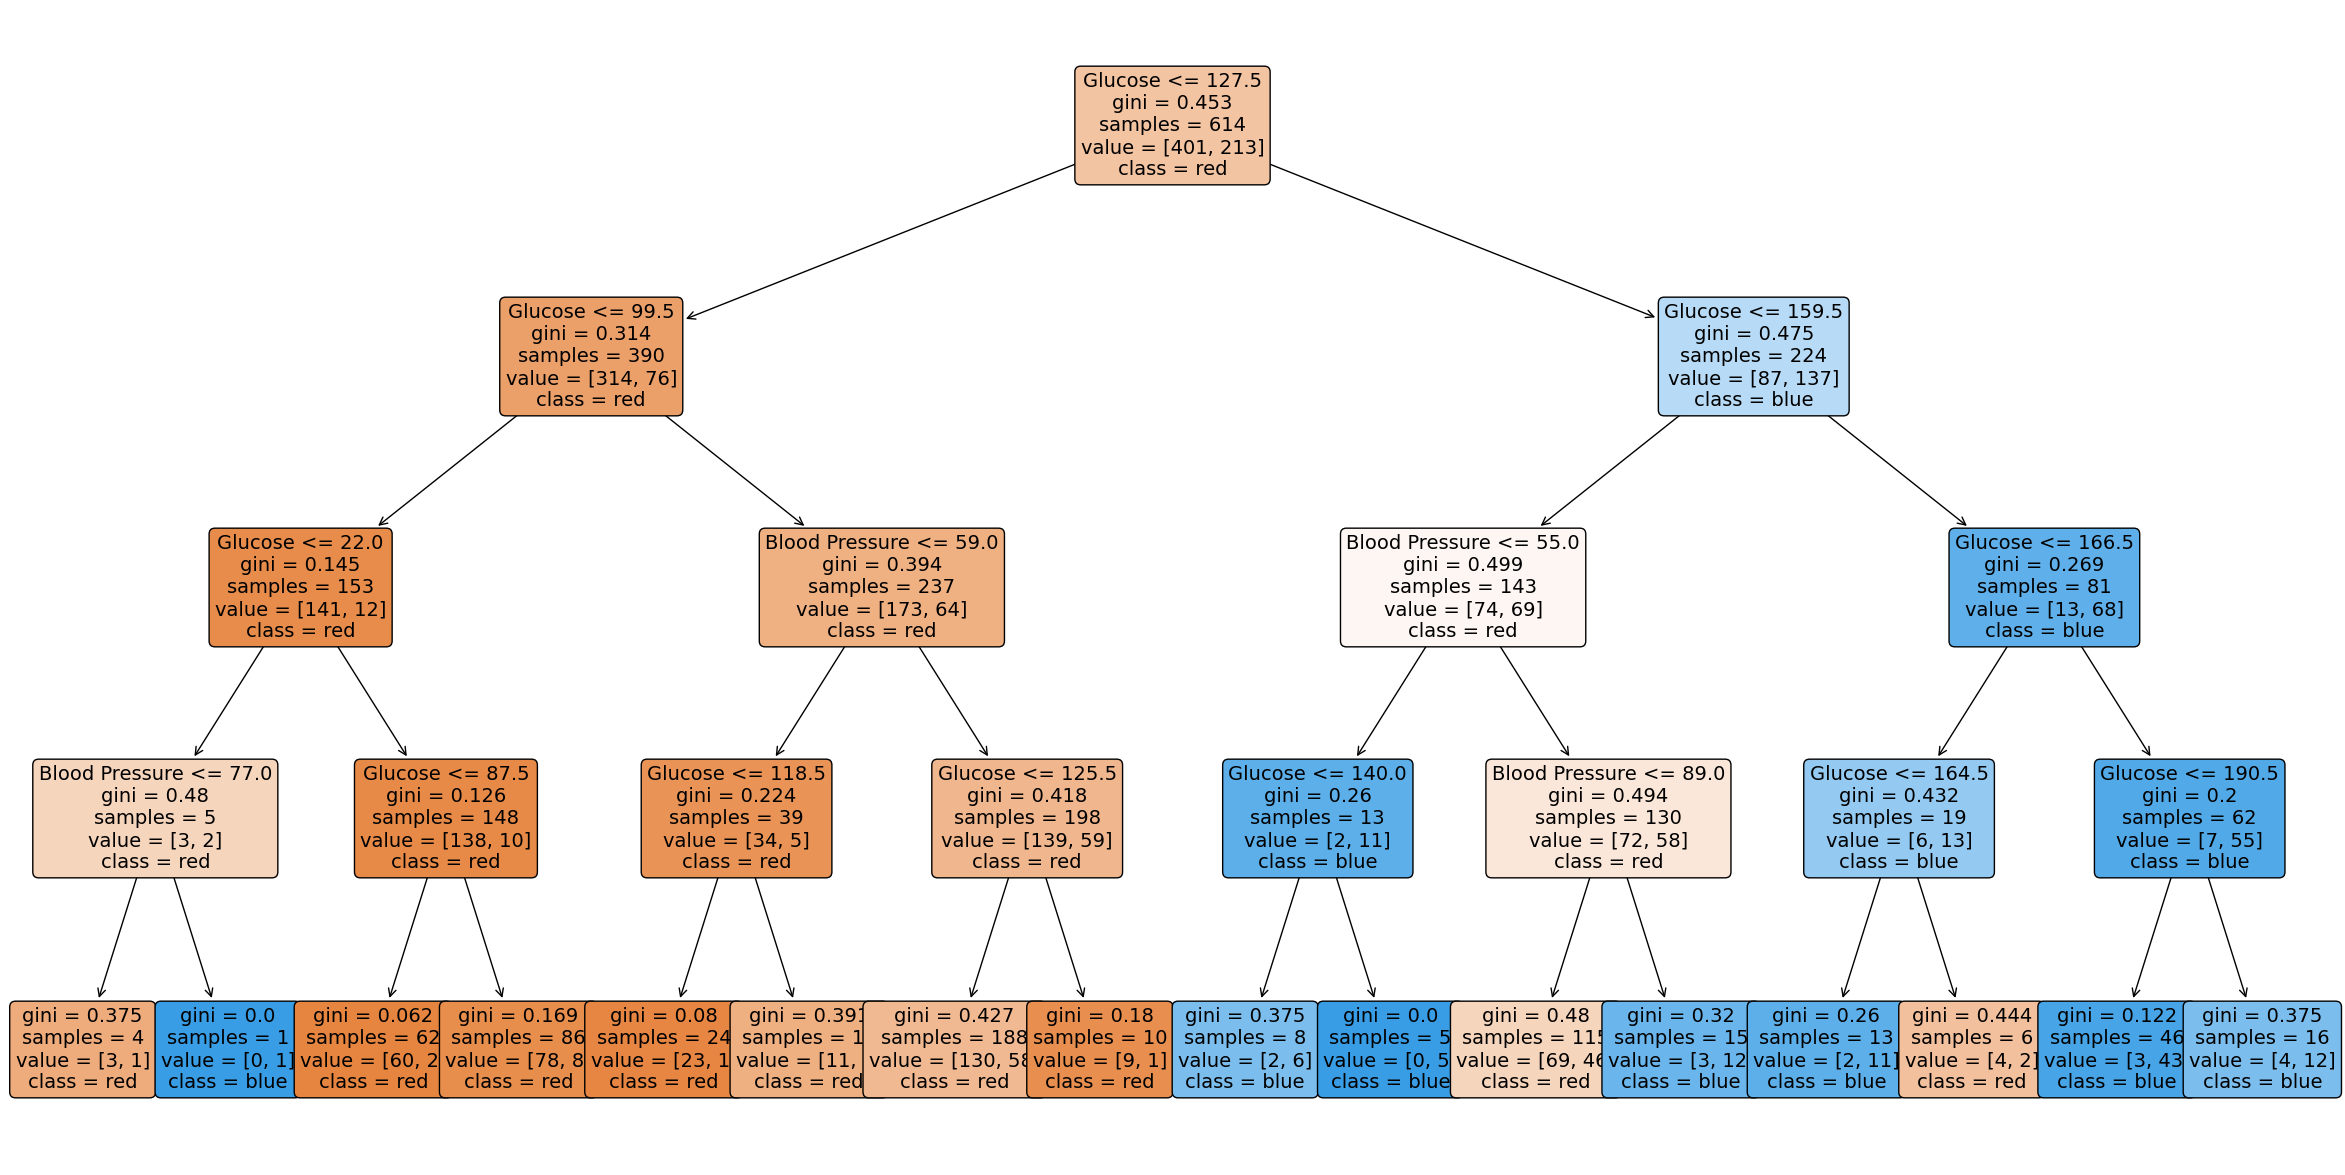

In [9]:
from sklearn import tree

# Set the size of the plot
plt.figure(figsize=(30, 15))

# Visualize the decision tree
tree.plot_tree(decision_tree, feature_names=features,
               class_names=labels,
               rounded=True,
               filled=True,
               fontsize=14)

# Display the decision tree
plt.show()


In [10]:
from sklearn.tree import export_text

# Generate text representation of the decision tree rules
tree_rules = export_text(decision_tree, feature_names=features)

# Display the decision tree rules
print(tree_rules)


|--- Glucose <= 127.50
|   |--- Glucose <= 99.50
|   |   |--- Glucose <= 22.00
|   |   |   |--- Blood Pressure <= 77.00
|   |   |   |   |--- class: 0
|   |   |   |--- Blood Pressure >  77.00
|   |   |   |   |--- class: 1
|   |   |--- Glucose >  22.00
|   |   |   |--- Glucose <= 87.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  87.50
|   |   |   |   |--- class: 0
|   |--- Glucose >  99.50
|   |   |--- Blood Pressure <= 59.00
|   |   |   |--- Glucose <= 118.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  118.50
|   |   |   |   |--- class: 0
|   |   |--- Blood Pressure >  59.00
|   |   |   |--- Glucose <= 125.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  125.50
|   |   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- Glucose <= 159.50
|   |   |--- Blood Pressure <= 55.00
|   |   |   |--- Glucose <= 140.00
|   |   |   |   |--- class: 1
|   |   |   |--- Glucose >  140.00
|   |   |   |   |--- class: 1
|   |   |--- Blood Pressure >  55.00
|   |  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


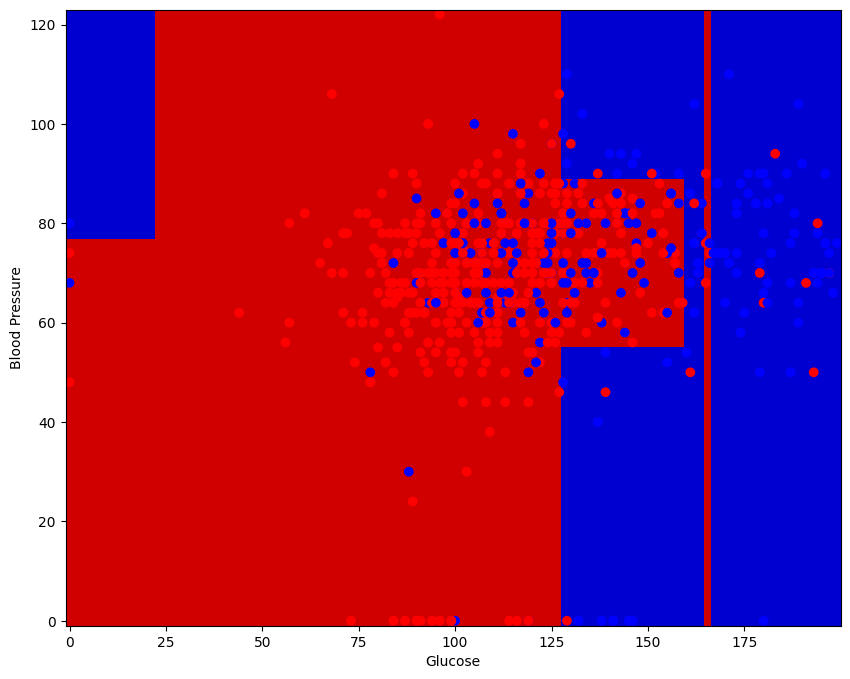

In [11]:
# Set the plot step size
plot_step = 0.02

# Create a figure
plt.figure(figsize=(10, 8))

# Define the plot limits
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

# Create meshgrid for contour plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create filled contour plot
cs = plt.contourf(xx, yy, Z, cmap="jet_r")

# Scatter plot the training data
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=c_train)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()


# Confusion Matrix

The confusion matrix provides a detailed breakdown of a classification model's performance by outlining various prediction outcomes. It captures the four fundamental elements: true positives, false positives, false negatives, and true negatives. Each element represents a specific prediction scenario—correctly identifying true cases (true positives), incorrectly classifying false cases as true (false positives), missing actual true cases (false negatives), and accurately identifying true negative cases (true negatives). This matrix offers a comprehensive overview of the model's predictive accuracy, making it a direct and insightful tool to assess classification performance.

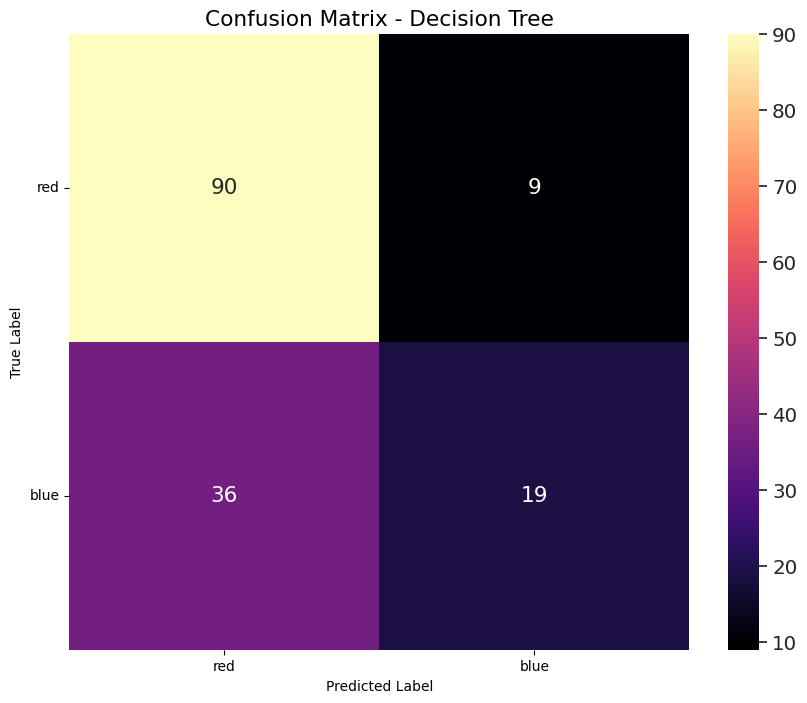

In [12]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# import metrics from sklearn
from sklearn import metrics

# import seaborn for visualization
import seaborn as sns

# calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# convert the confusion matrix into a dataframe for visualization
matrix_df = pd.DataFrame(confusion_matrix)

# plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)  # set the font scale for better readability
sns.heatmap(matrix_df,  # use seaborn's heatmap function
            annot=True,  # annotate each cell with the numeric value
            fmt="g",  # format for the annotations
            ax=ax,  # define the axes for the plot
            cmap="magma")  # choose the color map for the heatmap
ax.set_title("Confusion Matrix - Decision Tree")  # set the title of the plot
ax.set_xlabel("Predicted Label", fontsize=10)  # label for the x-axis
ax.set_xticklabels(labels)  # set the x-axis tick labels
ax.set_ylabel("True Label", fontsize=10)  # label for the y-axis
ax.set_yticklabels(labels, rotation=0)  # set the y-axis tick labels with no rotation
plt.show()  # display the heatmap plot


Plotting the decision for test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


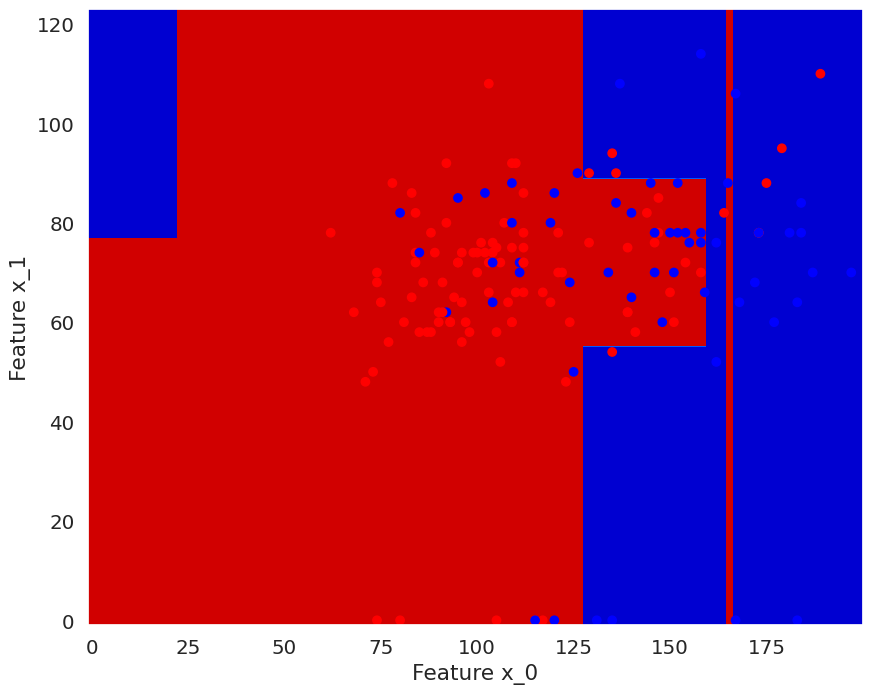

In [13]:
# Set the step size for the contour plot
plot_step = 0.02

# Create a new figure for plotting
plt.figure(figsize=(10, 8))

# Define the range of values for x and y axes
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

# Create a mesh grid based on the range and step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Predict the classification using the decision tree model for each point in the mesh grid
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using a filled contour plot
cs = plt.contourf(xx, yy, Z, cmap="jet_r")

# Plot the testing data points on the decision boundary plot
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=c_test)

# Set labels for x and y axes
plt.xlabel("Feature x_0")
plt.ylabel("Feature x_1")

# Display the plot
plt.show()


Calculating the precision

In [14]:
# Display precision score
print("Precision Score:")

# Calculate precision score for each class
precision = metrics.precision_score(y_test, test_pred_decision_tree, average=None)

# Create a DataFrame to store precision scores for different classes
precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns={0: "Precision"}, inplace=True)
precision_results


Precision Score:


,Precision
red,0.714286
blue,0.678571


In [16]:
#Recall and the f1-score

print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        99
           1       0.68      0.35      0.46        55

    accuracy                           0.71       154
   macro avg       0.70      0.63      0.63       154
weighted avg       0.70      0.71      0.68       154



# Influence of Different Tree Depth on the model performance
## Depth = 3

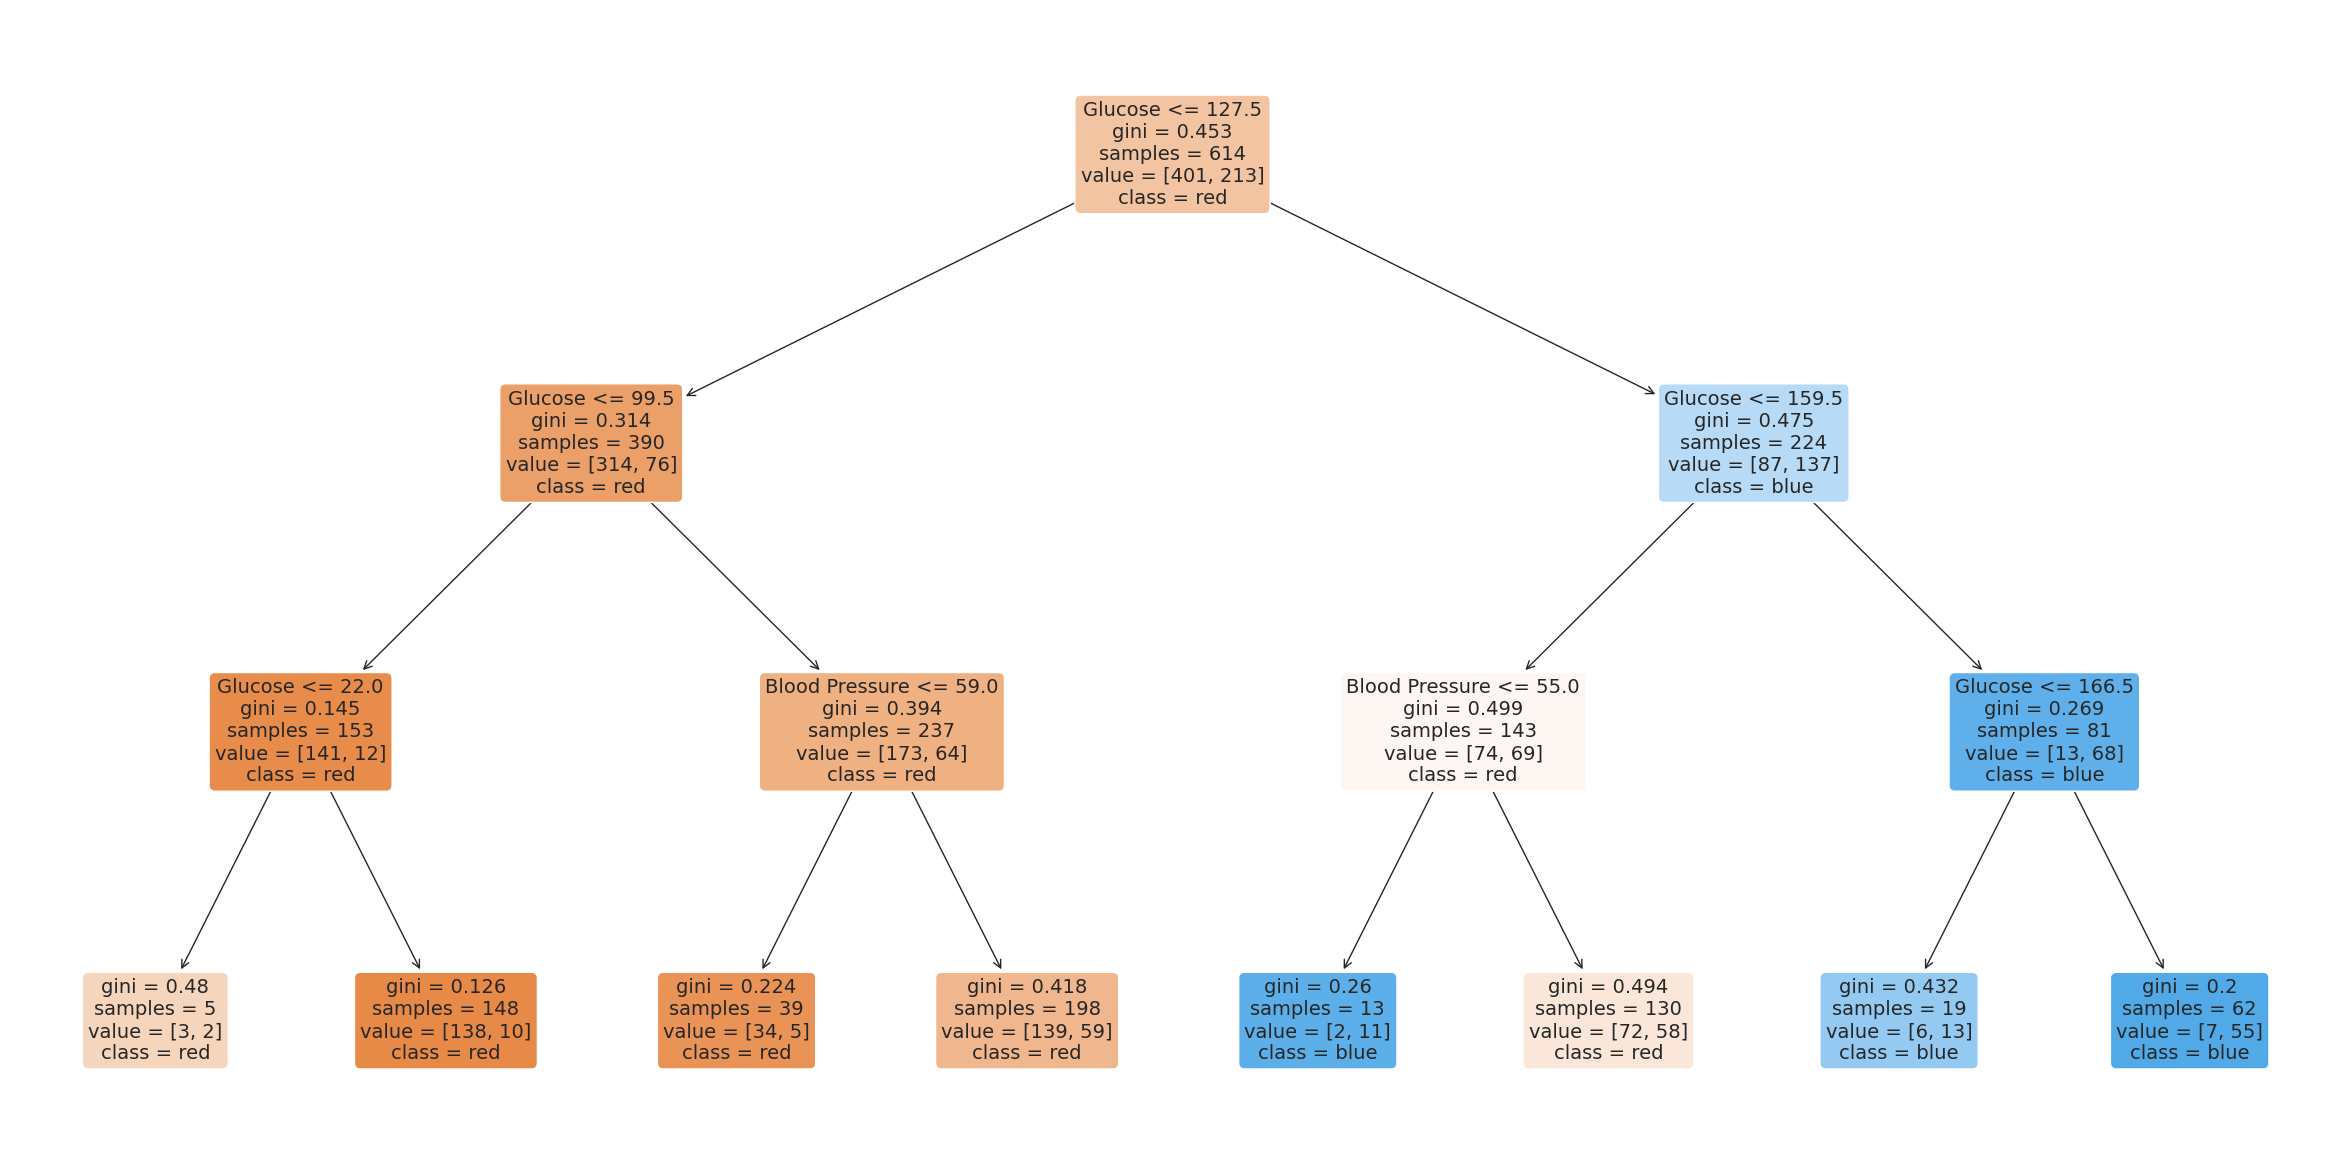

In [17]:
# Importing the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initializing a DecisionTreeClassifier with a maximum depth of 3 and a fixed random state for reproducibility
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fitting the decision tree model with training data
decision_tree.fit(X_train, y_train)

# Importing tree from sklearn for visualizing the decision tree model
from sklearn import tree

# Setting up the figure size for the plot
plt.figure(figsize=(30, 15))

# Generating the visual representation of the decision tree
tree.plot_tree(
    decision_tree,
    feature_names=features,  # Providing feature names for the tree nodes
    class_names=labels,      # Providing class labels for tree leaves
    rounded=True,            # Ensuring nodes are displayed in a rounded shape
    filled=True,             # Filling the nodes with colors
    fontsize=14              # Setting the font size of the displayed text
)

# Displaying the decision tree plot
plt.show()


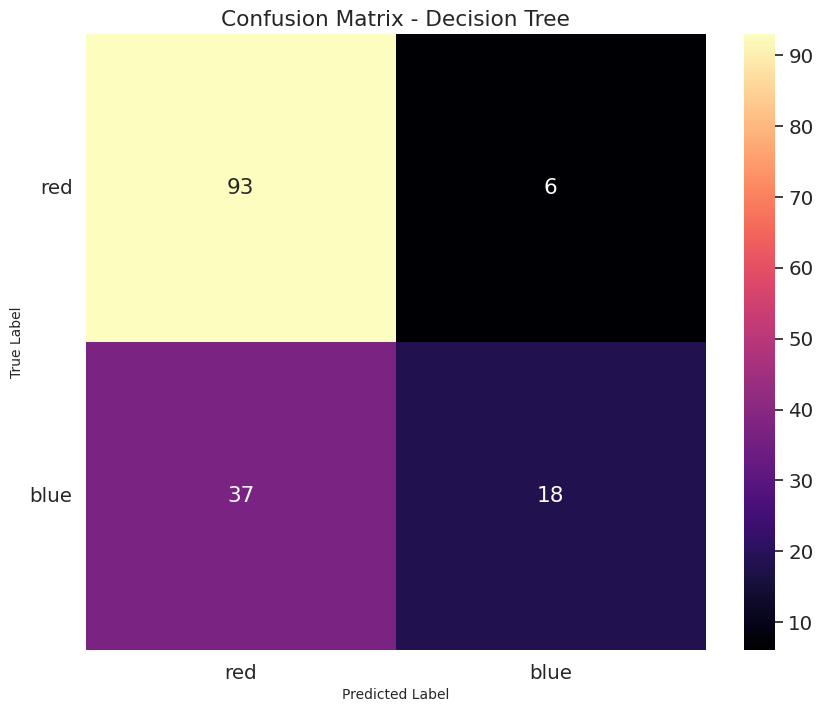

In [18]:
# Predicting values using the trained decision tree model on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Importing necessary metrics from sklearn
from sklearn import metrics

# Importing seaborn for visualization; note that visualizing the tree above this step might create display issues
import seaborn as sns

# Calculating the confusion matrix using true values (y_test) and predicted values (test_pred_decision_tree)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Converting the confusion matrix into a pandas DataFrame for better visualization
matrix_df = pd.DataFrame(confusion_matrix)

# Setting up the plot dimensions and attributes using seaborn heatmap
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)  # Setting the font scale for readability
sns.heatmap(
    matrix_df,
    annot=True,         # Displaying annotations (numbers) in the cells
    fmt="g",            # Formatting for numeric values
    ax=ax,
    cmap="magma"        # Using the magma colormap for heatmap colors
)

# Setting title and labels for better interpretation
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)       # Setting x-axis labels based on class labels
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels, rotation=0)  # Setting y-axis labels based on class labels with no rotation
plt.show()


In [19]:
# Calculating precision scores for each class using the predicted and true test labels
precision = metrics.precision_score(y_test, test_pred_decision_tree, average=None)

# Creating a DataFrame to store precision scores for different classes indexed by class labels
precision_results = pd.DataFrame(precision, index=labels)

# Renaming the column for clarity, as it represents precision scores
precision_results.rename(columns={0: "precision"}, inplace=True)

# Displaying the precision scores for each class using the DataFrame
precision_results


,precision
red,0.715385
blue,0.750000


# Depth = 6

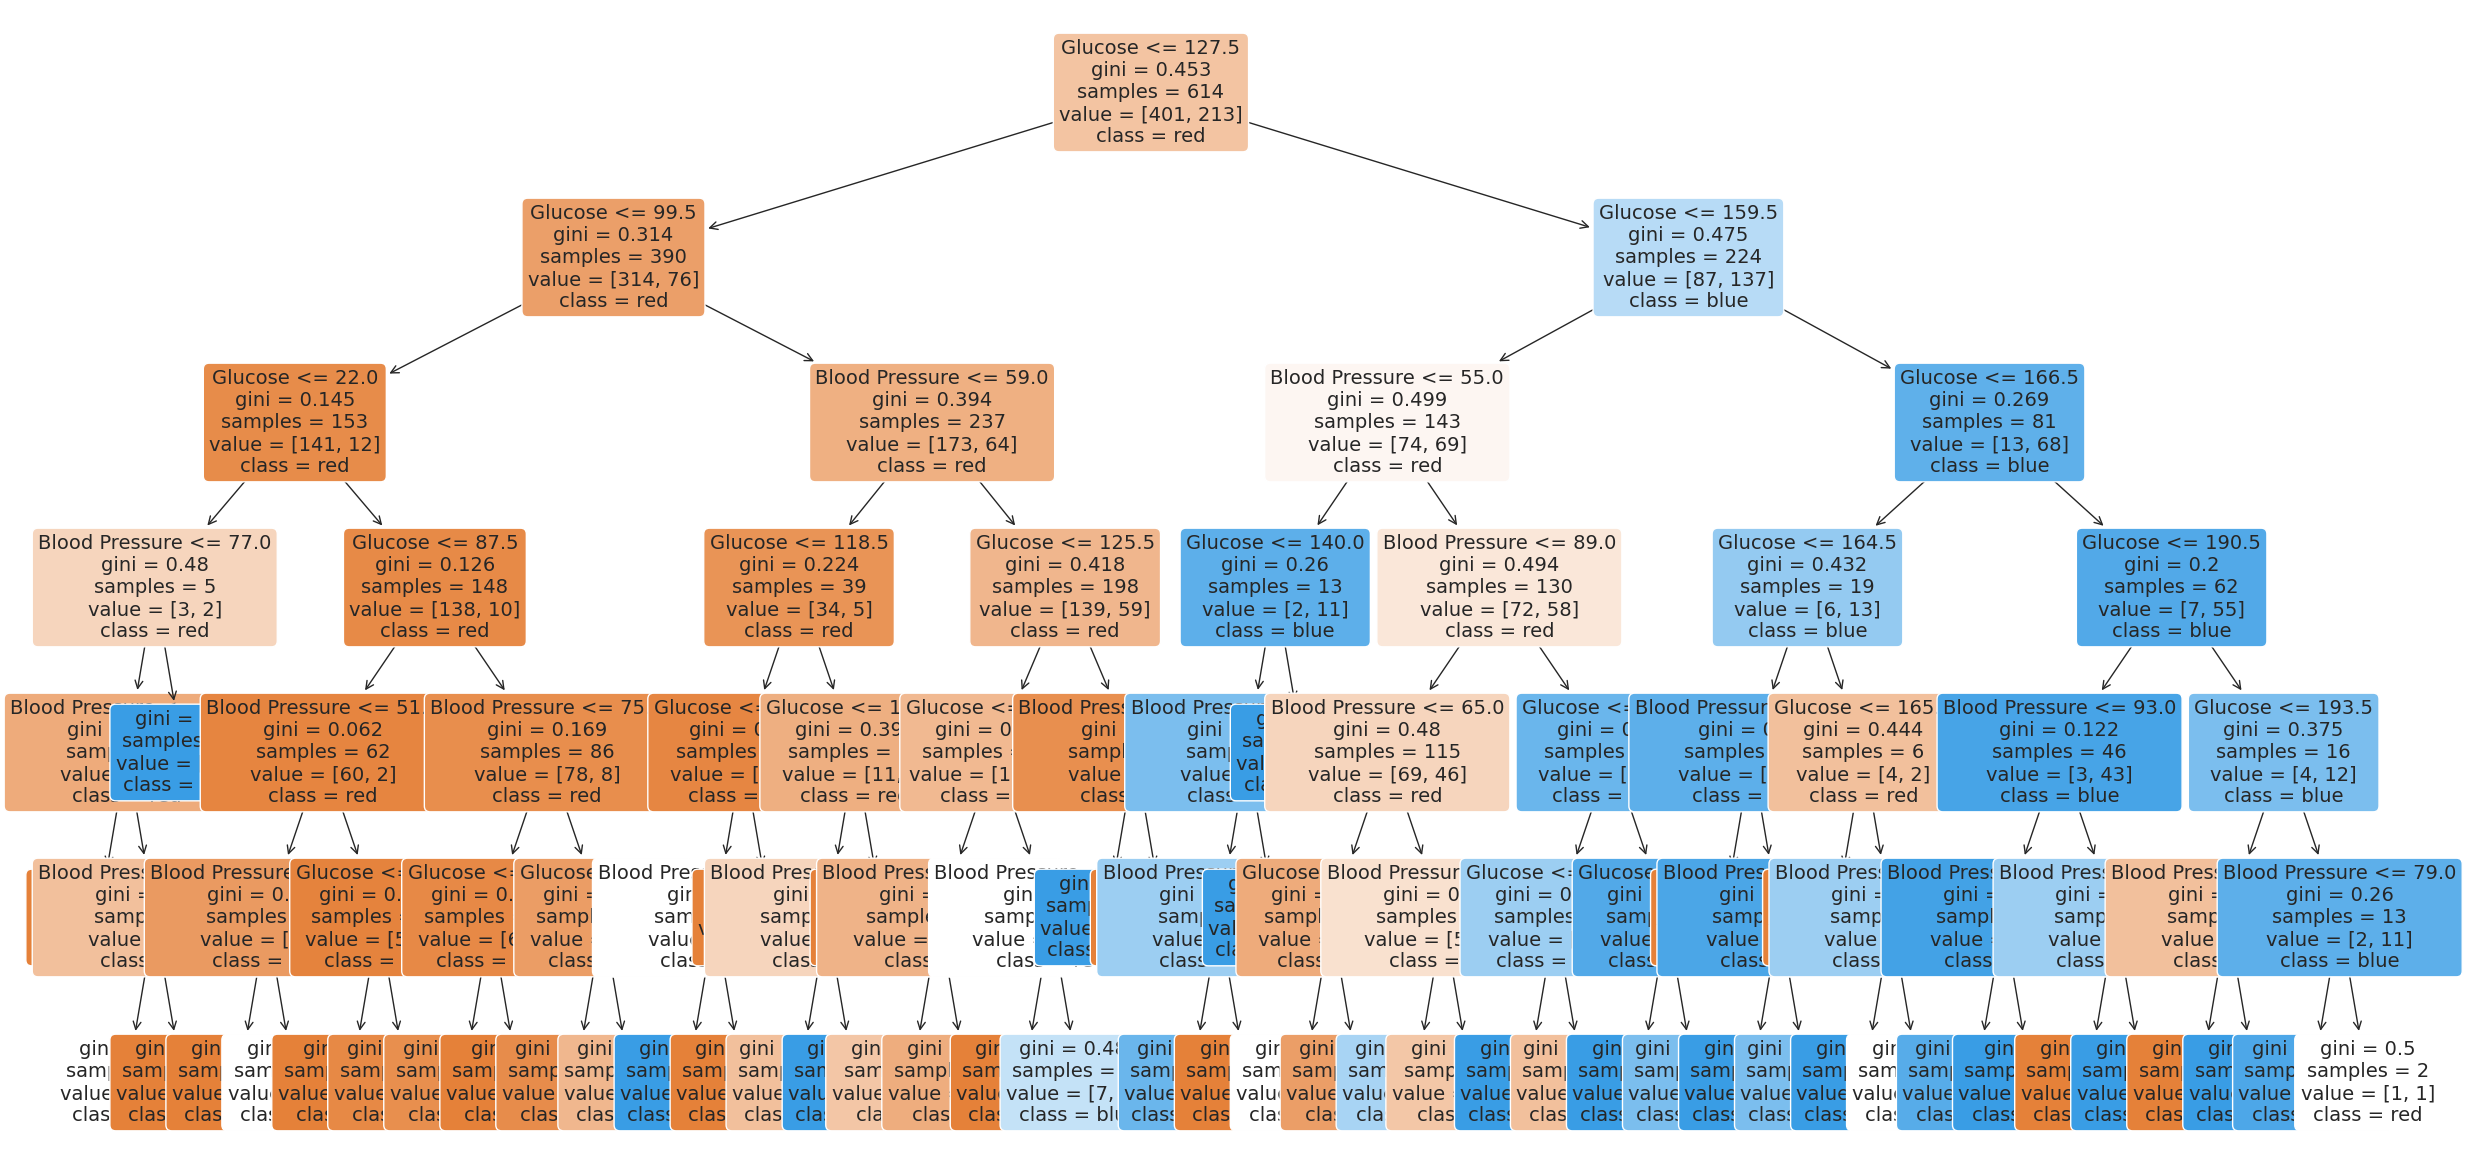

In [20]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 6, random_state = 42)
decision_tree.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize = (30,15))
a = tree.plot_tree(decision_tree, feature_names = features,
             class_names = labels,
             rounded = True,
             filled = True,
             fontsize = 14)
plt.show()

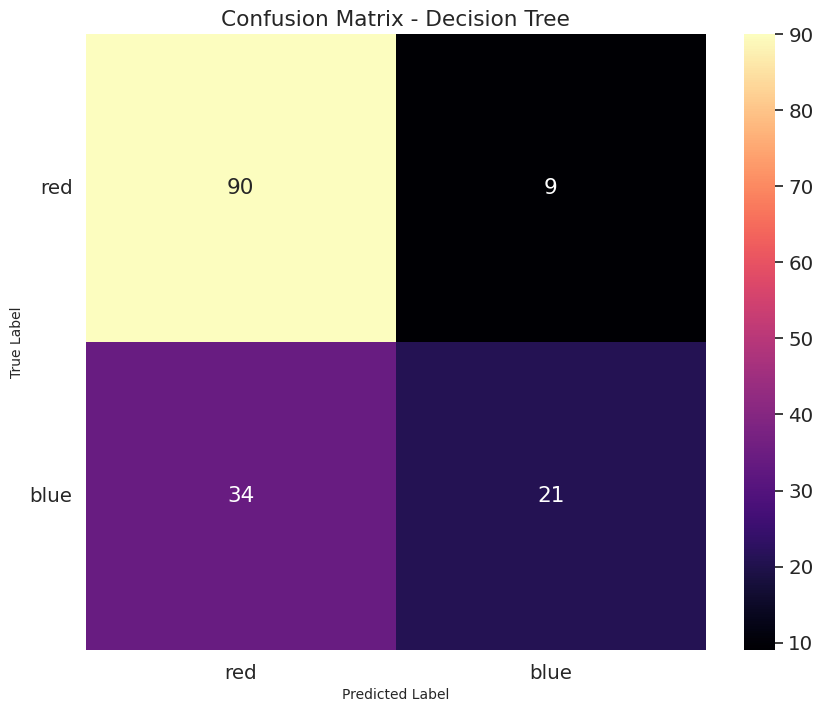

In [21]:
#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

#Import metrices from sklearn
from sklearn import metrics

#Notes: visulizing your tree above will be weird after running seaborn
import seaborn as sns

#The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

#COnvert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize = (10,8))
ax = plt.axes()
sns.set(font_scale = 1.3)
sns.heatmap(matrix_df,
           annot = True,
           fmt = "g",
           ax = ax,
           cmap = "magma")
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize = 10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 10)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

In [22]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree,
                                   average = None)

precision_results = pd.DataFrame(precision, index  = labels)
precision_results.rename(columns = {0:"precision"}, inplace = True)
precision_results


precision score


,precision
red,0.725806
blue,0.700000


The analysis suggests that altering the depth of the decision tree within a certain range doesn't significantly impact the model's predictive performance. The precision scores for both classes, represented by red and blue dots, remain consistently close to 0.7 regardless of the tree's depth. Additionally, the confusion matrices, indicating the model's classification accuracy for each class, exhibit similar patterns across varying tree depths, suggesting that the model's ability to discern between the two classes remains relatively stable.





